# **Project: TMDB Movie Dataset Analysis**

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset
I choose the TMDb movie dataset. the dataset contains information about 10,000 movies,  including id, popularity, budget, revenue, original title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production companies, release date, vote count, vote average, release year, budget adj, revenue adj.

### Questions:


1.   What are the 10 movies with the highest production budget?
2.   What are the 10 movies with the highest revenue?
3.   What are the top 10 most profitable movies in the market?
4.   What are the top ten movies with the highest popularity?
5.   What are the top ten movies with the highest vote average?
6.   What are the 10 movies with the highest runtime?
7.   What is the average movie runtime over time?
8.   What are the average movie profits over time?
9.   How many movies per year?
10.  In which year has the highest or lowest production of movies?
11.  What are the top 10 directors in 2014, according to the vote?
12.  How many movies per genre?
13.  How many movies per director?
14.  What are the top 10 most directors who have maximum movies?
15.  What are the most profitable months?




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.core.display import display
sns.set(rc={'figure.figsize':(14,6)})

<a id='wrangling'></a>
## Data Wrangling



In [3]:
df = pd.read_csv('/content/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d580bab10>,
      dtype=object)

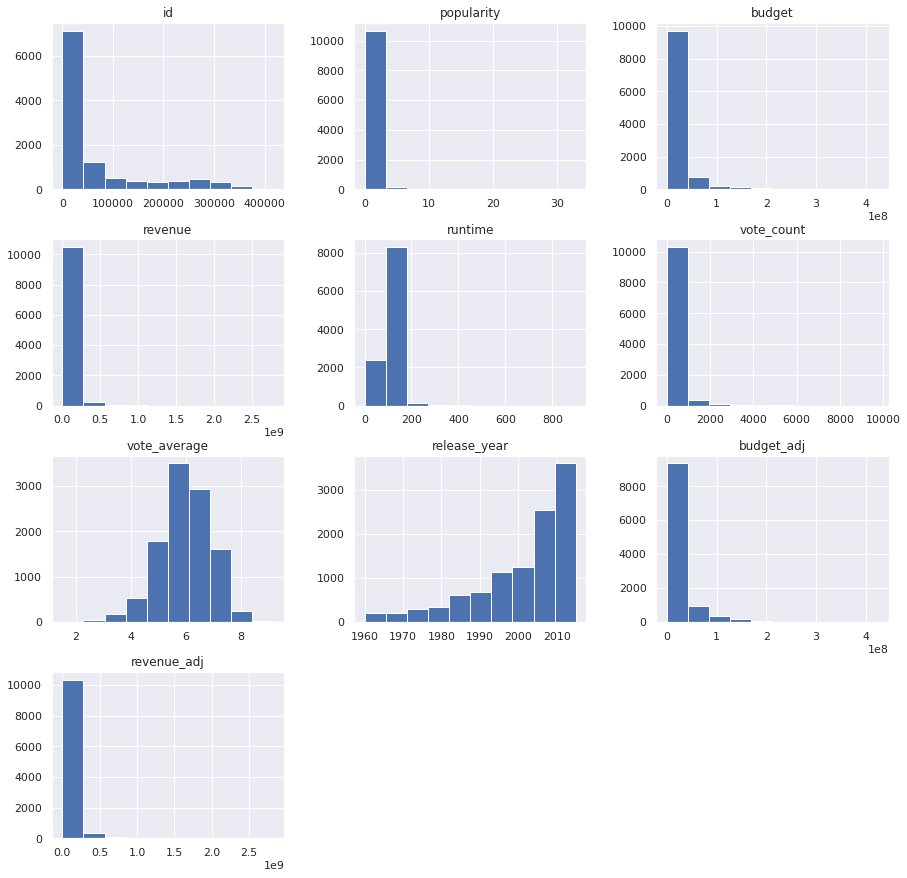

In [9]:
df.hist(figsize=(15,15))


### Data Cleaning

Drop unnecessary columns

In [10]:
df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj','production_companies','keywords'], axis=1, inplace=True)

In [11]:
df.duplicated().sum()

1

Drop duplicates

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

Drop null values

In [14]:
df.dropna(subset=['cast','director','genres'], how='any', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   release_date    10731 non-null  object 
 10  vote_count      10731 non-null  int64  
 11  vote_average    10731 non-null  float64
 12  release_year    10731 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


Clean the invalid data

In [16]:
df.drop(df.query('runtime == 0 or budget == 0 or revenue == 0 or popularity == 0').index, axis=0, inplace=True)
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3849.000000,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000
mean,39885.146791,1.192933,3.724886e+07,1.078148e+08,109.217459,528.387114,6.168693,2001.258249
std,67248.890597,1.475622,4.221699e+07,1.766175e+08,19.914141,880.333629,0.794697,11.285642
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,6072.000000,0.463337,1.000000e+07,1.367069e+07,95.000000,71.000000,5.700000,1995.000000
50%,11313.000000,0.798582,2.400000e+07,4.490726e+07,106.000000,205.000000,6.200000,2004.000000
75%,38575.000000,1.374300,5.000000e+07,1.243052e+08,119.000000,581.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


In [17]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


 Changing format of release date into datetime format

In [18]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (What are the 10 movies with the highest production budget?)

The 10 movies with the highest budget:



,original_title,budget
2244,The Warrior's Way,425000000
3375,Pirates of the Caribbean: On Stranger Tides,380000000
7387,Pirates of the Caribbean: At World's End,300000000
14,Avengers: Age of Ultron,280000000
6570,Superman Returns,270000000
1929,Tangled,260000000
4411,John Carter,260000000
7394,Spider-Man 3,258000000
5508,The Lone Ranger,255000000
643,X-Men: Days of Future Past,250000000


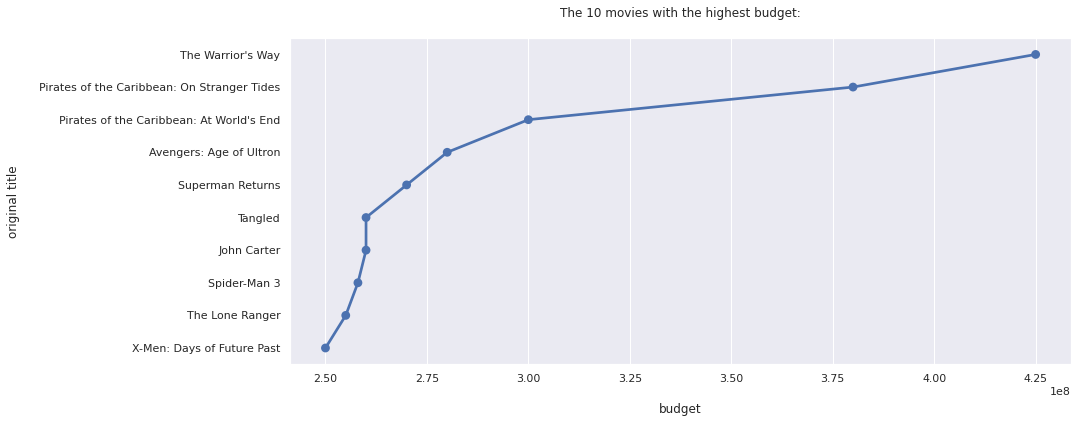

In [19]:
def top_movies(df, column , top=10):
  # extract data
  top = df.sort_values([column], ascending = False).loc[:,['original_title',column]].head(10)
  # plot
  ax = sns.pointplot(data = top, x = column, y = 'original_title')
  # Add title and format it
  ax.set_title("The 10 movies with the highest {}:\n".format(column))
  # Add x label and format it
  ax.set_xlabel("\n{}".format(column))
  # Add y label
  ax.set_ylabel("original title\n")  
  # display dataframe
  print('The 10 movies with the highest {}:\n'.format(column))
  display(top)

# call function
top_movies(df,'budget', top=10)

After seeing the plot and the output I can conclude that **'The Warrior's Way'** is a movie that has the highest production budget.

### Research Question 2 (What are the 10 movies with the highest revenue?)

The 10 movies with the highest revenue:



,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


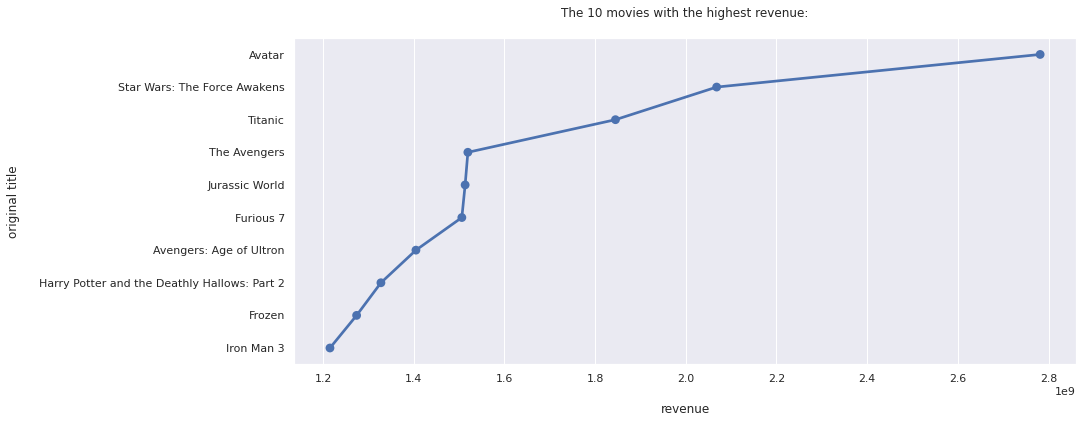

In [20]:
# call function
top_movies(df,'revenue', top=10)

After seeing the plot and the output I can conclude that **'Avatar'** is a movie that has the highest revenue.

### Research Question 3 (What are the top 10 most profitable movies in the market?)

The 10 movies with the highest profits:



,original_title,profits
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360
4361,The Avengers,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822
14,Avengers: Age of Ultron,1125035767
5422,Frozen,1124219009
8094,The Net,1084279658


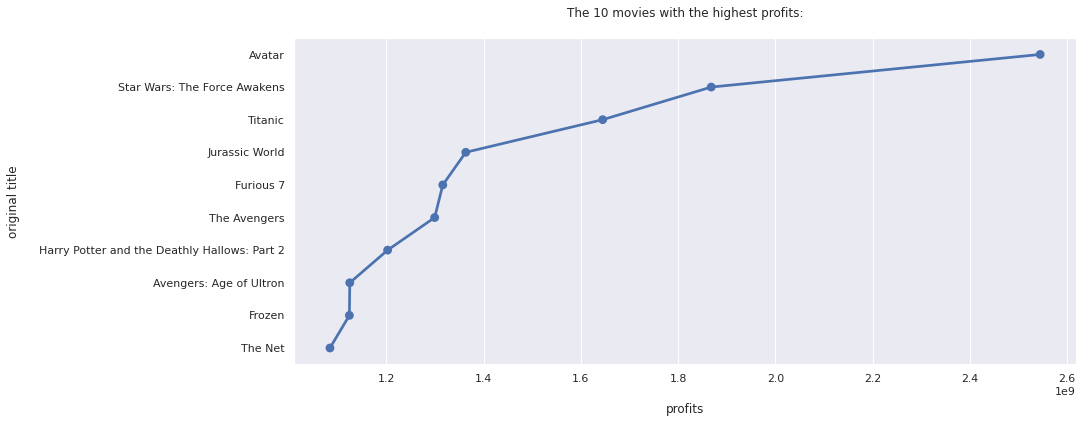

In [21]:
# add a new column (profits) in the dataframe
df['profits'] = df['revenue'] - df['budget']
# call function
top_movies(df,'profits', top=10)

After seeing the plot and the output I can conclude that **'Avatar'** is a movie that has the highest profits in the market.

### Research Question 4 (What are the top ten movies with the highest popularity?)

The 10 movies with the highest popularity:



,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


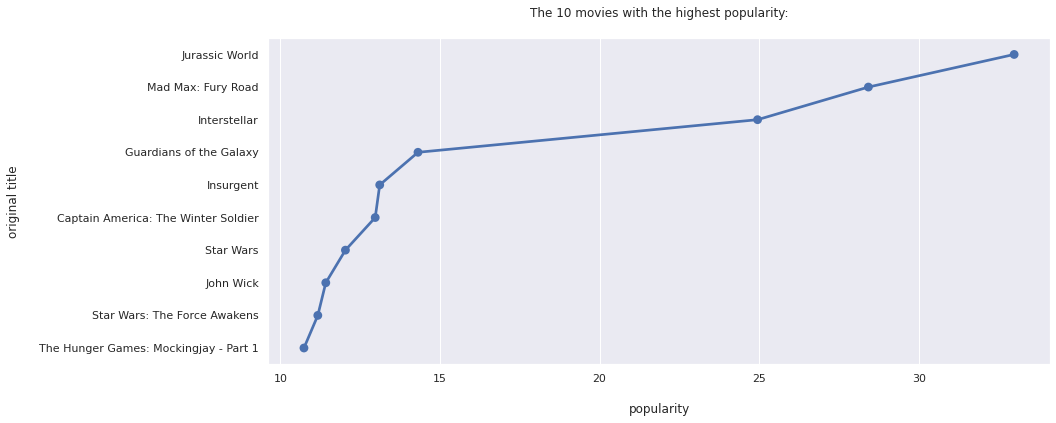

In [22]:
# call function
top_movies(df,'popularity', top=10)

After seeing the plot and the output I can conclude that **'Jurassic World'** is a movie that has the highest popularity.

### Research Question 5 (What are the top ten movies with the highest vote average?)

The 10 movies with the highest vote_average:



,original_title,vote_average
7948,Stop Making Sense,8.4
4178,The Shawshank Redemption,8.4
7269,The Godfather,8.3
650,Whiplash,8.2
2875,The Dark Knight,8.1
10222,Schindler's List,8.1
9758,The Godfather: Part II,8.1
4177,Pulp Fiction,8.1
4179,Forrest Gump,8.1
2409,Fight Club,8.1


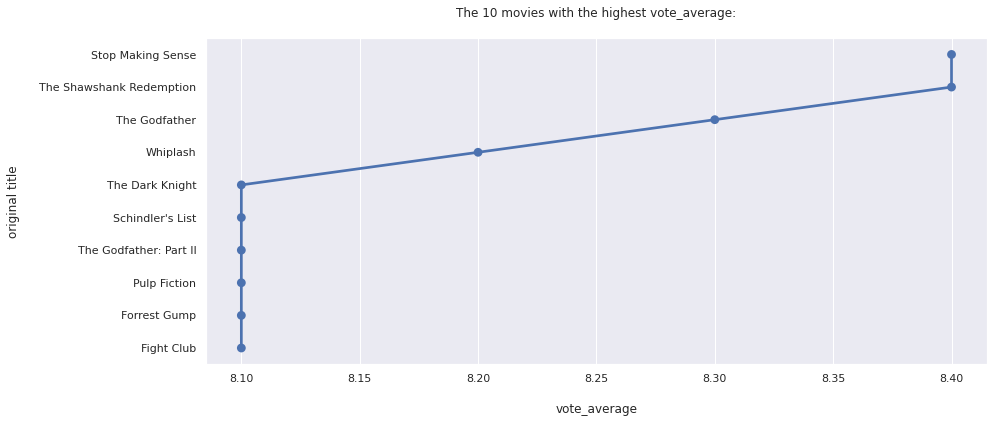

In [23]:
# call function
top_movies(df,'vote_average', top=10)

After seeing the plot and the output I can conclude that **'Stop Making Sense'** is a movie that has the highest vote average.

### Research Question 6 (What are the 10 movies with the highest runtime?)

The 10 movies with the highest runtime:



,original_title,runtime
2107,Carlos,338
10443,Cleopatra,248
7332,Heaven's Gate,219
9850,Lawrence of Arabia,216
5065,Gods and Generals,214
3110,Jodhaa Akbar,213
8282,Malcolm X,202
4949,The Lord of the Rings: The Return of the King,201
9758,The Godfather: Part II,200
10716,The Greatest Story Ever Told,199


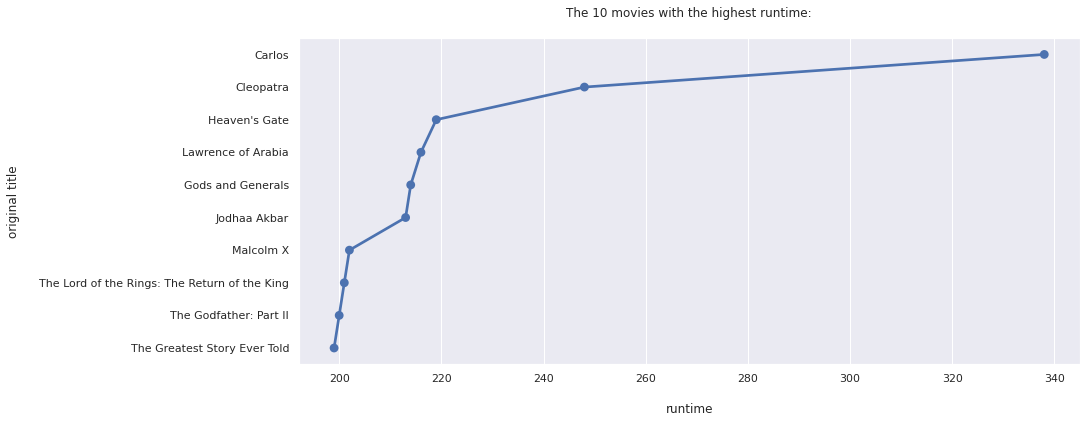

In [24]:
# call function
top_movies(df,'runtime', top=10)

After seeing the plot and the output I can conclude that **'Carlos'** is a movie that has the highest runtime.

### Research Question 7 (What is the average movie runtime over time?)

In [25]:
# group DataFrame
average_runtime_over_time = df.groupby('release_year')['runtime'].mean()
average_runtime_over_time

release_year
1960    130.000000
1961    132.500000
1962    141.285714
1963    153.500000
1964    122.428571
1965    167.600000
1966    132.200000
1967    118.384615
1968    130.777778
1969    127.500000
1970    121.454545
1971    112.615385
1972    113.000000
1973    111.916667
1974    122.000000
1975    119.333333
1976    118.333333
1977    108.789474
1978    122.882353
1979    115.437500
1980    113.304348
1981    105.133333
1982    112.653846
1983    107.677419
1984    108.619048
1985    104.658537
1986    105.125000
1987    103.304348
1988    104.642857
1989    106.705882
1990    108.207547
1991    109.720000
1992    112.830189
1993    111.236111
1994    109.274194
1995    111.543210
1996    109.639535
1997    114.722222
1998    111.271739
1999    109.043103
2000    109.169811
2001    109.008264
2002    107.119048
2003    107.966942
2004    106.904762
2005    109.717791
2006    108.189349
2007    107.701220
2008    107.891566
2009    107.000000
2010    106.702247
2011    106.170854

Text(0, 0.5, 'runtime\n')

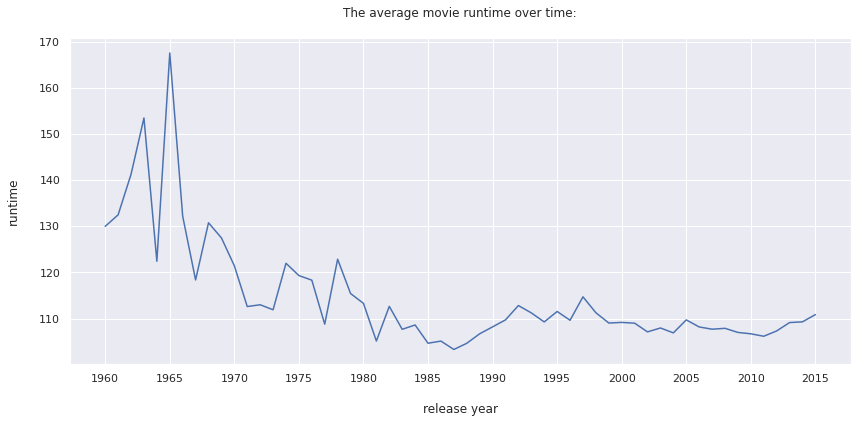

In [26]:
# plot
average_runtime_over_time.plot(xticks = np.arange(1960,2016,5))
# Add title
plt.title("The average movie runtime over time:\n")
# Add x label
plt.xlabel("\nrelease year")
# Add y label
plt.ylabel("runtime\n")

After seeing the plot and the output I can conclude that the average movie runtime over time is a decreasing.

### Research Question 8 (What are the average movie profits over time?)

In [27]:
# group DataFrame
average_profits_over_time = df.groupby('release_year')['profits'].mean()
average_profits_over_time

release_year
1960    2.163961e+07
1961    2.990832e+07
1962    2.383998e+07
1963    1.923531e+07
1964    4.209691e+07
1965    7.985637e+07
1966    1.049374e+07
1967    4.894882e+07
1968    1.869686e+07
1969    5.171575e+07
1970    4.127909e+07
1971    2.586805e+07
1972    5.715449e+07
1973    8.814051e+07
1974    5.004477e+07
1975    8.980081e+07
1976    4.196177e+07
1977    9.175308e+07
1978    5.912353e+07
1979    5.939563e+07
1980    4.356807e+07
1981    4.400838e+07
1982    6.968294e+07
1983    4.855077e+07
1984    4.365329e+07
1985    4.065607e+07
1986    3.469489e+07
1987    4.670754e+07
1988    4.133906e+07
1989    7.066551e+07
1990    6.518689e+07
1991    6.096243e+07
1992    7.307634e+07
1993    6.355317e+07
1994    7.587717e+07
1995    6.923578e+07
1996    5.507705e+07
1997    7.089157e+07
1998    5.732767e+07
1999    5.545870e+07
2000    5.764882e+07
2001    6.629789e+07
2002    7.148870e+07
2003    7.605087e+07
2004    6.681977e+07
2005    5.680646e+07
2006    5.163491e+07


Text(0, 0.5, 'profits\n')

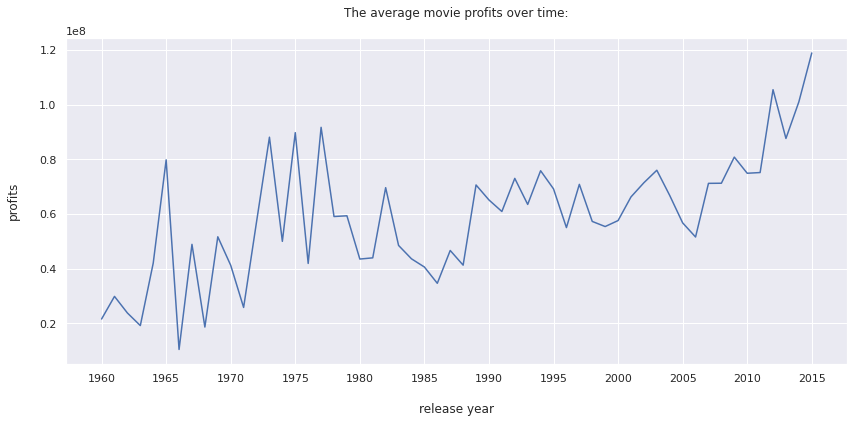

In [28]:
# plot
average_profits_over_time.plot(xticks = np.arange(1960,2016,5))
# Add title
plt.title("The average movie profits over time:\n")
# Add x label
plt.xlabel("\nrelease year")
# Add y label
plt.ylabel("profits\n")

After seeing the plot and the output I can conclude that the average movie profits over time vary, but most of them increase.

### Research Question 9 (How many movies per year?)




In [29]:
# group DataFrame
num_movies = df.groupby('release_year').count()['id']
num_movies

release_year
1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     48
1987     46
1988     56
1989     51
1990     53
1991     50
1992     53
1993     72
1994     62
1995     81
1996     86
1997     90
1998     92
1999    116
2000    106
2001    121
2002    126
2003    121
2004    147
2005    163
2006    169
2007    164
2008    166
2009    174
2010    178
2011    199
2012    157
2013    180
2014    165
2015    160
Name: id, dtype: int64

Text(0, 0.5, 'release year\n')

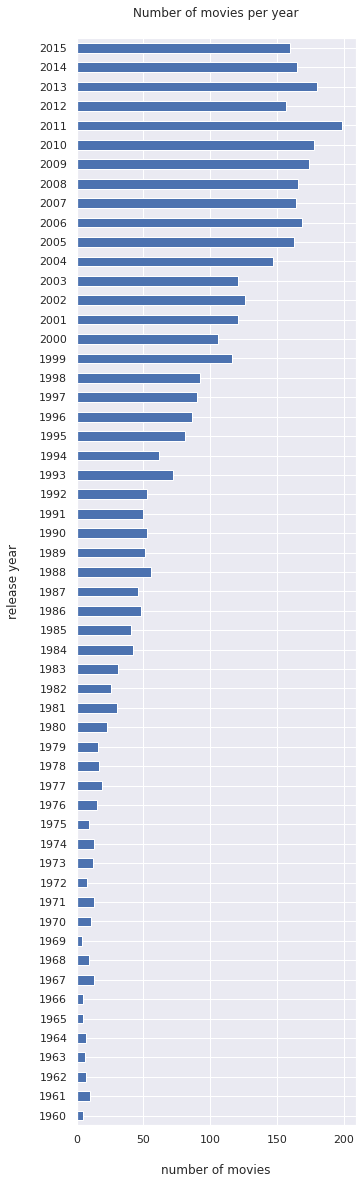

In [30]:
# plot
num_movies.plot(kind='barh', figsize=(5,20))
# Add title
plt.title("Number of movies per year\n")
# Add x label
plt.xlabel('\nnumber of movies')
# Add y label
plt.ylabel('release year\n')

Text(0, 0.5, 'number of movies\n')

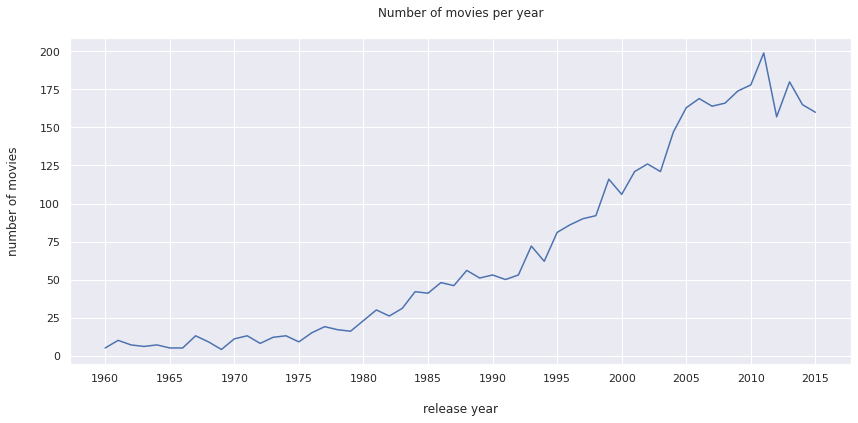

In [31]:
# plot
num_movies.plot(figsize = (14,6),xticks = np.arange(1960,2016,5))
# # Add title
plt.title("Number of movies per year\n")
# Add x label
plt.xlabel('\nrelease year',)
# Add y label
plt.ylabel('number of movies\n')

After seeing the plot and the output I can conclude that the number of movies is increasing every year.

### Research Question 10 (In which year has the highest or lowest production of movies?)

In [32]:
num_movies = num_movies.sort_values()
print('A year has the lowest production:\n',num_movies.head(1))
print('A year has the highest production:\n',num_movies.tail(1))

A year has the lowest production:
 release_year
1969    4
Name: id, dtype: int64
A year has the highest production:
 release_year
2011    199
Name: id, dtype: int64


After seeing the output I can conclude that 2014 is the year that has the highest production of movies and 1969 is the year that has the lowest production of movies.

### Research Question 11 (What are the top 10 directors in 2014, according to the vote?)

In [33]:
# group DataFrame
best_director = df.loc[df['release_year']==2014].groupby('director').max().vote_average
# sort values
best_director = best_director.sort_values(ascending=False)
best_director

director
Damien Chazelle                        8.2
Xavier Dolan                           8.0
Christopher Nolan                      8.0
Morten Tyldum                          8.0
David Fincher                          7.9
                                      ... 
GrÃ©gory Levasseur                     4.7
Brian A Miller                         4.6
Matt Bettinelli-Olpin|Tyler Gillett    4.5
Renny Harlin                           4.4
Vic Armstrong                          3.8
Name: vote_average, Length: 160, dtype: float64

director
Damien Chazelle            8.2
Xavier Dolan               8.0
Christopher Nolan          8.0
Morten Tyldum              8.0
David Fincher              7.9
Wes Anderson               7.9
James Gunn                 7.9
Don Hall|Chris Williams    7.8
James Marsh                7.8
Josh Boone                 7.8
Name: vote_average, dtype: float64

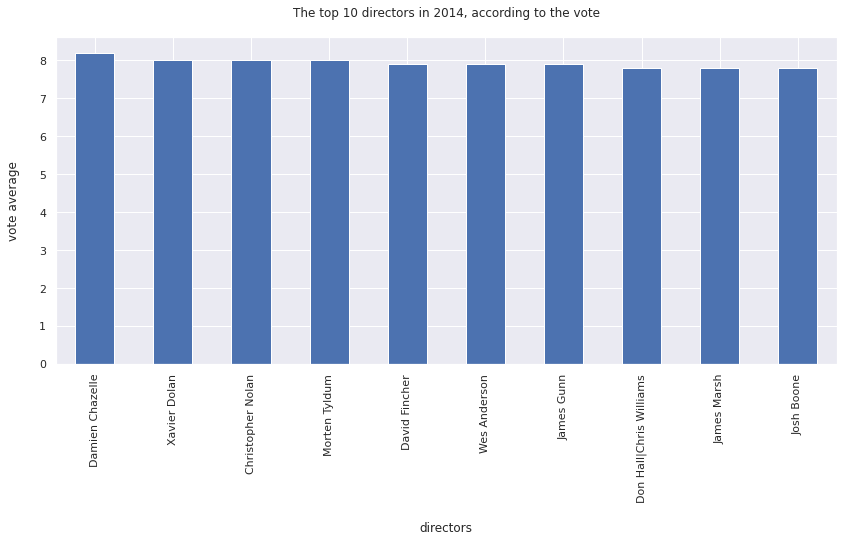

In [34]:
# plot
(best_director.head(10)).plot(kind='bar',figsize = (14,6))
# Add title
plt.title("The top 10 directors in 2014, according to the vote\n")
# Add x label
plt.xlabel('\ndirectors',)
# Add y label
plt.ylabel('vote average\n')

best_director.head(10)

After seeing the plot and the output I can conclude that Carl Tibbetts, Paul Dugdale, Damien Chazelle, Stephen Daldry, Brett Sullivan, Tomm Moore, Morten Tyldum, Patrick Osborne, Christopher Nolan, Xavier Dolan, Dan Storey are the top 10 directors in 2014, according to the vote.

### Research Question 12  (How many movies per genre?)

In [35]:
#split genres
genres_data = pd.Series((df['genres'].str.cat(sep = '|')).split('|'))

genres_data = genres_data.value_counts(ascending=False)
genres_data

Drama              1753
Comedy             1357
Thriller           1203
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               134
History             129
War                 119
Western              52
Documentary          31
Foreign              12
TV Movie              1
dtype: int64

Text(0, 0.5, 'number of movies\n')

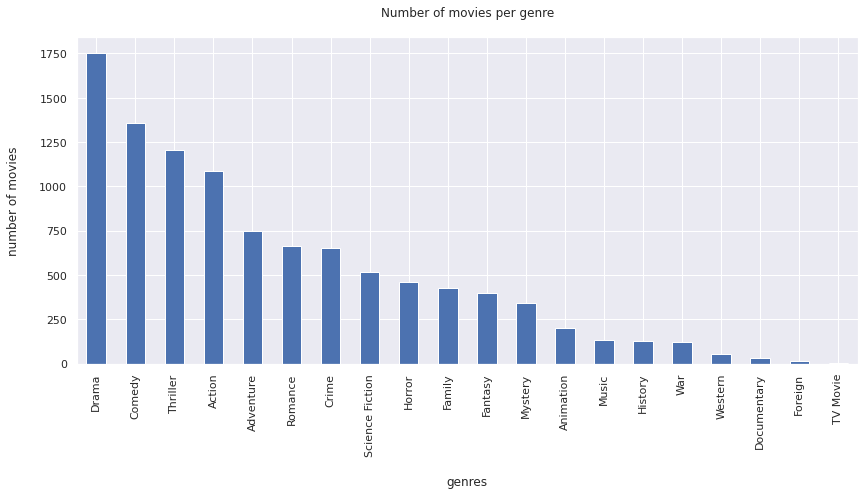

In [36]:
# plot
genres_data.plot(kind='bar',figsize = (14,6))
# Add title
plt.title("Number of movies per genre\n")
# Add x label
plt.xlabel('\ngenres',)
# Add y label
plt.ylabel('number of movies\n')

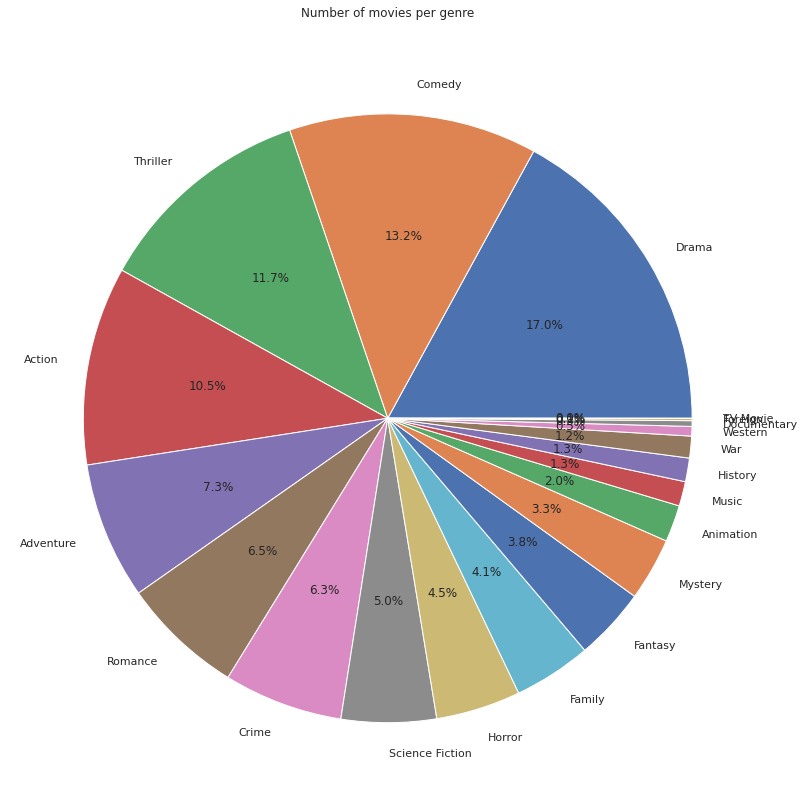

In [37]:
# plot
genres_data.plot(kind="pie",figsize = (14,14),autopct="%1.1f%%")
# Add title
plt.title("Number of movies per genre\n")
# Add y label
plt.ylabel('');
# Add x label
plt.xlabel('');

After seeing the bar plot, pie plot and output I can conclude that Drama is the most popular genre, following by Comedy, Thriller, Action, Romance, Horror, etc.

### Research Question 13 (How many movies per director?)



In [38]:
# group DataFrame
num_movies_per_director = df.groupby('director').count()['id']
# sort values
num_movies_per_director = num_movies_per_director.sort_values(ascending = False)
num_movies_per_director

director
Steven Spielberg      27
Clint Eastwood        24
Ridley Scott          21
Woody Allen           18
Steven Soderbergh     17
                      ..
Marc Evans             1
Marcel Langenegger     1
Marco Brambilla        1
Marco Schnabel         1
 FrÃ©dÃ©ric Jardin     1
Name: id, Length: 1710, dtype: int64

### Research Question 14 (What are the top 10 most directors who have maximum movies?)


director
Steven Spielberg     27
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Steven Soderbergh    17
Martin Scorsese      17
Tim Burton           16
Oliver Stone         15
Brian De Palma       15
Robert Zemeckis      15
Name: id, dtype: int64

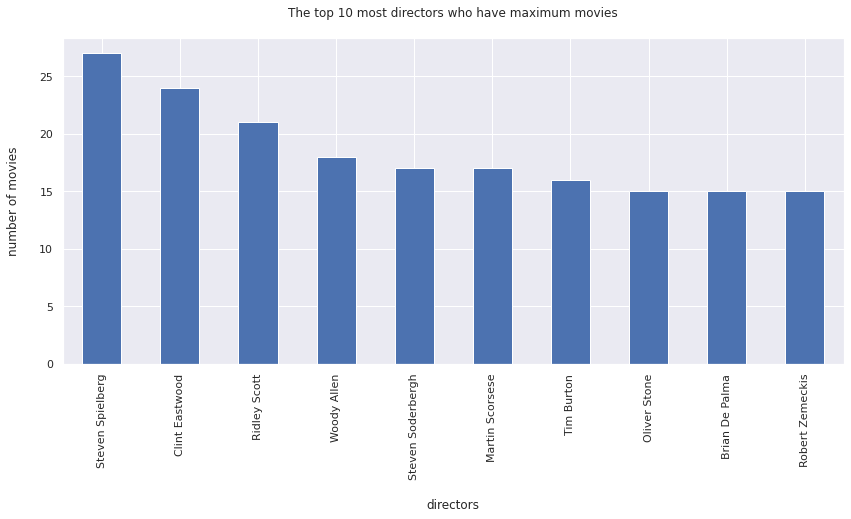

In [39]:
# plot
(num_movies_per_director.head(10)).plot(kind='bar',figsize = (14,6))
# Add title
plt.title("The top 10 most directors who have maximum movies\n")
# Add x label
plt.xlabel('\ndirectors',)
# Add y label
plt.ylabel('number of movies\n')

num_movies_per_director.head(10)

After seeing the plot and the output I can conclude that Woody Allen, Clint Eastwood, Steven Spielberg, Martin Scorsese, Ridley Scott, Ron Howard, Steven Soderbergh, Joel Schumacher, Brian De Palma, Wes Craven are the top 10 most directors who have maximum movies.

### Research Question 15 (What are the most profitable months?)


In [40]:
# add a new column (month) in the dataframe
df['month'] = df['release_date'].dt.month
# group DataFrame
profits_in_months = df.groupby('month')['profits'].mean()
profits_in_months

month
1     3.051471e+07
2     4.056733e+07
3     6.559951e+07
4     5.997196e+07
5     1.187381e+08
6     1.266208e+08
7     9.404407e+07
8     4.074104e+07
9     2.941643e+07
10    4.730233e+07
11    1.001690e+08
12    9.198651e+07
Name: profits, dtype: float64

Text(0, 0.5, 'profits\n')

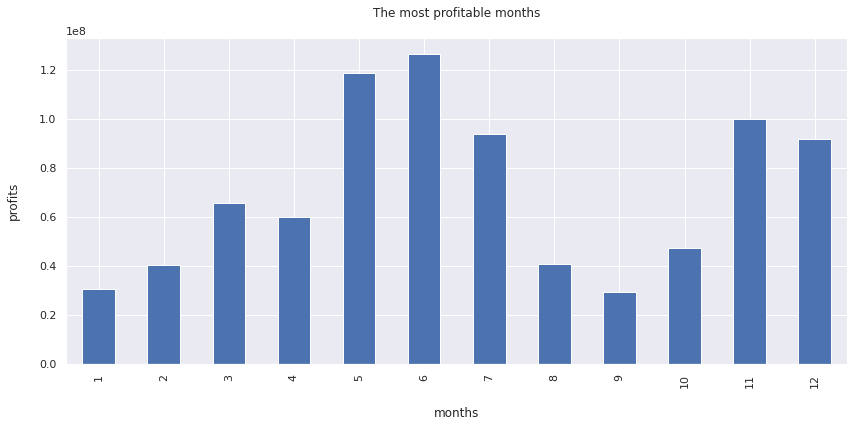

In [41]:
# plot
profits_in_months.plot(kind='bar',figsize = (14,6))
# Add title
plt.title("The most profitable months\n")
# Add x label
plt.xlabel('\nmonths',)
# Add y label
plt.ylabel('profits\n')

After seeing the plot and the output I can conclude that Month 6 is the most profitable Month, following by Month 5, Month 12, Month 11, Month 7, Month 3, Month 4, Month 8, Month 2, Month 10, Month 9, Month 1.

<a id='conclusions'></a>
## Conclusions


- The Warrior's Way, Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End, Avengers: Age of Ultron, Superman Returns, John Carter, Tangled, Spider-Man 3, The Lone Ranger, Harry Potter and the Half-Blood Prince **are movies with the highest production budget.**

- Avatar, Star Wars: The Force Awakens, Titanic, The Avengers, Jurassic World, Furious 7, Avengers: Age of Ultron, Harry Potter and the Deathly Hallows: Part 2, Frozen, Iron Man 3 **are movies with the highest revenue.**	

- Avatar, Star Wars: The Force Awakens, Titanic, The Avengers, Jurassic World, Furious 7, Avengers: Age of Ultron, Harry Potter and the Deathly Hallows: Part 2, Frozen, The Net **are the top 10 most profitable movies in the market.**	

- Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy, Insurgent, Captain America: The Winter Soldier, Star Wars, John Wick, Star Wars: The Force Awakens,  The Hunger Games: Mockingjay - Part 1 **are the top ten movies with the highest popularity.**

- The Story of Film: An Odyssey, Black Mirror: White Christmas, Pink Floyd: Pulse, The Art of Flight, A Personal Journey with Martin Scorsese, Dave Chappelle: Killin' Them Softly, Queen - Rock Montreal, The Shawshank Redemption, Rush: Beyond the Lighted Stage, The Jinx: The Life and Deaths of Robert Durst **are the top ten movies with the highest vote average.**

- The Story of Film: An Odyssey, Taken, Band of Brothers, Shoah, Planet Earth, The Pacific, John Adams, Life, Generation Kill, The Pillars of the Earth **are the 10 movies with the highest runtime.**

- **I've noticed that the average movie runtime over time is a decreasing.**

- **I've noticed that the average movie profits over time vary, but most of them increase.**

- **I've noticed that the number of movies is increasing every year.**

- **2014 is a year that has the highest production of movies.**

- **1969 is a year that has the lowest production of movies.**

- Carl Tibbetts, Paul Dugdale, Damien Chazelle, Stephen Daldry, Brett Sullivan, Tomm Moore, Morten Tyldum, Patrick Osborne, Christopher Nolan, Xavier Dolan, Dan Storey **are the top 10 directors in 2014, according to the vote.**

- **Drama is the most popular genre, following by Comedy, Thriller, Action, Romance, Horror, etc.**

- Woody Allen, Clint Eastwood, Steven Spielberg, Martin Scorsese, Ridley Scott, Ron Howard, Steven Soderbergh, Joel Schumacher, Brian De Palma, Wes Craven **are the top 10 most directors who have maximum movies.**   

- **Month 6 is the most profitable Month, following by Month 5, Month 12, Month 11, Month 7, Month 3, Month 4, Month 8, Month 2,  Month 10, Month 9, Month 1.**


## Limitations
- Missing values in the dataset affect the results.
- Duplicates values in the dataset affect the results.
- Some budget and revenue values in the dataset have zeros values.
- Incorrect data type.

## Resources
- https://pandas.pydata.org/docs/
- https://seaborn.pydata.org/
- https://github.com/udacity/data-analyst

